<hr/> <h1 style="text-align: center;"><span style="color: #666699;"<em><strong>  Analyse Exploratoire du Jeu de Données des Maladies Cardiaques </strong></em></span></h1><hr />

## Importer les packages

In [1]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro ,kruskal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Importer les données  

In [2]:
# Charger les données
data = pd.read_csv("Medicaldataset.csv")

In [3]:
# Afficher les premières lignes
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
# Afficher les dimensions
data.shape

(1319, 9)

In [5]:
# Colonnes du jeu de données
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [6]:
# Info sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## Preprocessing

In [7]:
# Valeurs manquantes
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
# Séparation en variables quantitatives et qualitatives
var_quant = ['Age', 'Heart rate', 'Systolic blood pressure',
             'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
var_cal = ['Gender','Result']

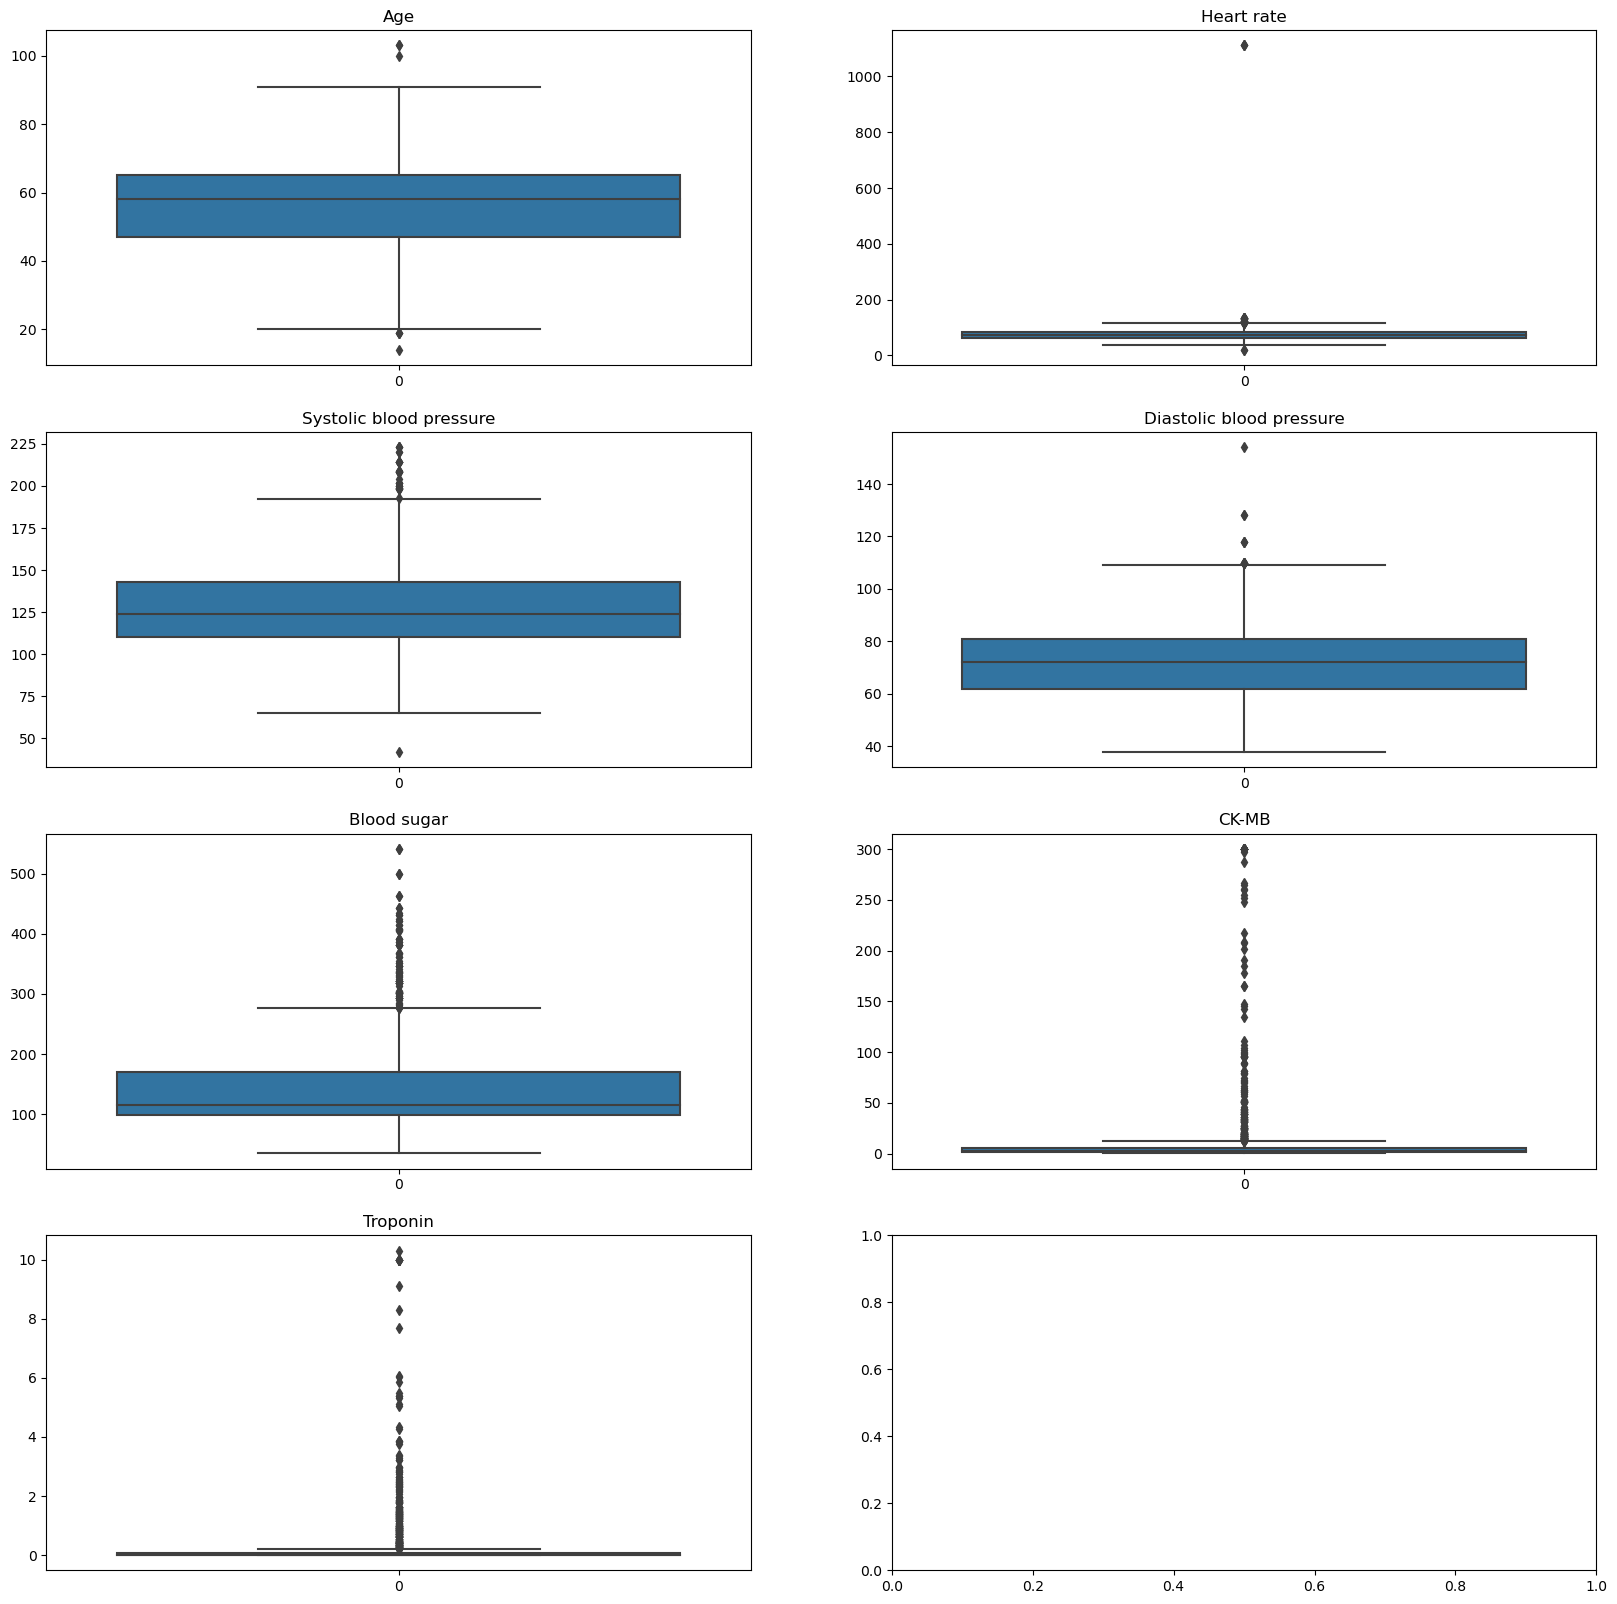

In [9]:
# Boxplots des variables quantitatives pour rechercher des valeurs abbérantes
plt.subplots(4,2,figsize=(20,20))
for i , var in enumerate(var_quant,1):
    plt.subplot(4,2,i)
    sns.boxplot(data[var])
    plt.title(var)

In [10]:
# Fonction de détection des outliers par la méthode de l'Intervalle InterQuartile
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    return data[(data[col] < borne_inf) | (data[col] > borne_sup)]

In [11]:
detect_outliers_iqr(data,"Age")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
97,19,0,62,114,69,240.0,300.000,0.004,positive
500,19,0,70,117,76,91.0,36.240,0.025,positive
896,100,1,60,209,75,329.0,5.660,0.840,positive
899,14,0,89,111,57,133.0,2.620,0.012,negative
1039,103,0,86,146,92,120.0,69.320,0.059,positive
1126,103,0,56,171,56,150.0,51.960,0.044,positive
1269,19,1,68,116,74,99.0,0.606,0.003,negative


In [12]:
detect_outliers_iqr(data,"Heart rate")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
21,48,1,135,98,60,100.0,94.790,0.004,positive
30,54,1,125,131,82,95.0,1.310,8.300,positive
63,45,1,1111,141,95,109.0,1.330,1.010,positive
125,47,1,125,121,60,89.0,2.270,0.392,positive
221,63,1,120,140,90,100.0,98.480,0.031,positive
222,55,1,122,147,95,96.0,3.860,0.005,negative
223,63,1,119,170,107,129.0,2.610,0.005,negative
287,44,0,117,112,74,113.0,2.640,0.009,negative
346,60,1,134,111,69,163.0,3.080,0.025,positive
351,69,1,119,113,79,184.0,8.870,0.005,positive


In [13]:
detect_outliers_iqr(data,"Systolic blood pressure")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
7,63,1,60,214,82,87.0,300.000,2.370,positive
12,64,1,60,199,99,92.0,3.430,5.370,positive
89,61,1,60,202,88,111.0,0.633,6.050,positive
186,62,0,61,193,86,96.0,2.990,0.004,negative
209,60,1,68,42,64,106.0,0.879,0.426,negative
220,60,0,110,220,128,101.0,1.280,0.002,negative
311,63,1,74,208,100,100.0,2.540,0.145,positive
411,74,0,90,198,48,102.0,38.940,0.052,positive
427,58,0,69,214,88,95.0,185.100,0.011,positive
428,21,1,85,204,84,93.0,2.710,0.002,negative


In [14]:
detect_outliers_iqr(data,"Diastolic blood pressure")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
179,68,1,67,191,110,165.0,2.580,0.010,negative
220,60,0,110,220,128,101.0,1.280,0.002,negative
404,72,1,79,159,110,175.0,2.920,1.550,positive
486,63,1,74,223,118,161.0,2.970,0.628,positive
645,47,0,81,200,110,97.0,13.730,0.959,positive
670,51,1,74,223,118,105.0,1.600,0.004,negative
893,54,0,65,191,110,140.0,2.590,0.540,positive
969,63,1,81,200,110,208.0,2.500,0.009,negative
999,29,0,74,223,118,86.0,4.930,0.003,positive
1203,65,1,77,76,154,93.0,3.810,0.029,positive


In [15]:
detect_outliers_iqr(data,"Blood sugar")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1,21,1,94,98,46,296.0,6.750,1.060,positive
4,55,1,64,112,65,300.0,1.080,0.003,negative
14,47,1,76,120,70,319.0,2.570,0.003,negative
20,60,1,92,151,78,301.0,1.600,0.005,negative
28,47,0,66,134,57,279.0,300.000,0.007,positive
...,...,...,...,...,...,...,...,...,...
1267,60,0,60,209,75,500.0,1.490,0.019,positive
1274,70,1,103,126,75,541.0,0.665,0.014,negative
1294,50,0,79,92,55,415.0,16.950,0.005,positive
1310,70,0,80,135,75,351.0,2.210,10.000,positive


In [16]:
detect_outliers_iqr(data,"CK-MB")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
3,64,1,70,120,55,270.0,13.87,0.122,positive
7,63,1,60,214,82,87.0,300.00,2.370,positive
21,48,1,135,98,60,100.0,94.79,0.004,positive
23,30,1,63,110,68,107.0,50.46,0.003,positive
24,50,1,63,104,63,269.0,38.72,0.612,positive
...,...,...,...,...,...,...,...,...,...
1291,58,1,98,91,50,182.0,15.23,0.013,positive
1294,50,0,79,92,55,415.0,16.95,0.005,positive
1306,60,0,78,109,69,230.0,19.47,0.003,positive
1309,47,1,94,105,81,135.0,36.24,0.263,positive


In [17]:
detect_outliers_iqr(data,"Troponin")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1,21,1,94,98,46,296.0,6.750,1.060,positive
7,63,1,60,214,82,87.0,300.000,2.370,positive
12,64,1,60,199,99,92.0,3.430,5.370,positive
16,86,0,73,114,68,87.0,1.110,0.776,positive
22,52,1,76,109,85,227.0,0.665,0.491,positive
...,...,...,...,...,...,...,...,...,...
1309,47,1,94,105,81,135.0,36.240,0.263,positive
1310,70,0,80,135,75,351.0,2.210,10.000,positive
1316,45,1,85,168,104,96.0,1.240,4.250,positive
1317,54,1,58,117,68,443.0,5.800,0.359,positive


### Interprêtation des boxplots

Les boxplots  et l'investigation par la méthode de l'IQR indiquent qu'il y aurait des valeurs dans certaines variables. 
| Variables | Interprêtation | Estimation
| --- | --- | --- |
| Age | On a des âges variant de 14 à 103 ans. Les valeurs aux différents extrèmes sont néanmoins possibles | Considérer comme une possibilité
| heartRate | On a des rythmes cardiaques variant de 20 à 140 battements par minute. Les valeurs aux différents extrèmes sont  assez élevé mais pas improbables surtout dans le cas de sujets susceptibles d'avoire un infarctus. Cependant nous remarquons trois patients qui sont très éloignés des autres avec un même rythme cardiage de 1111 battements par minute| Les valeurs de 1111 battements par minute sont physiologiquement anormale pour un être humain. Il faudra supprimer ces cas vu qu'ils ne sont que trois
| Systolic blood pressure | Il n'y a pas d'outlier en dessous de la moustache. Toutefois, on a des pressions systoliques allant jusqu'à 230 mmHg. Les valeurs aux différents extrèmes sont  assez élevé | Cela est tout de même possible et s'expliquerait si le patient est hypertendu, si sa pression diastolique est aussi élevée et s'il y a un risque d'infarctus.
| Diastolic blood pressure | Il y a un outlier dessous de la moustache : 42mmHg de pression diastolique une valeur qui est physiologiquement possible. On a aussi des pressions diastoliques allant à 160 mmHg ce qui est assez élevé | Cela est tout de même possible et s'expliquerait si le patient est hypertendu et si sa pression systolique est aussi élevée 
| Blood sugar | Pas d'outlier en dessous de la moustache. Toutefois, on a des glycémie allant jusqu'à 540 mg/dL ce qui est assez élevé mais pourrait témoigner d'une hyperglycémie sévère| Possible si les sujets présentent un risque de maladie cardiovasculaire et de diabète.
| CK-MB | On a des concentrations de Créatine kinase-MB dans le sang allant jusqu'à 300 U/L ce qui est assez élevé mais pas improbables surtout dans le cas de sujets susceptibles d'avoire un infarctus | Possible si les sujets présentent un risque d'infarctus
| Troponin| On a des concentration de troponine dans le sang allant jusqu'à 10 U/L ce qui est assez élevé mais pas improbables surtout dans le cas de sujets susceptibles d'avoire un infarctus | Possible si les sujets présentent un risque d'infarctus

## Analyse univariée

In [18]:
# Statistiques descriptives
data.describe(include='all')

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


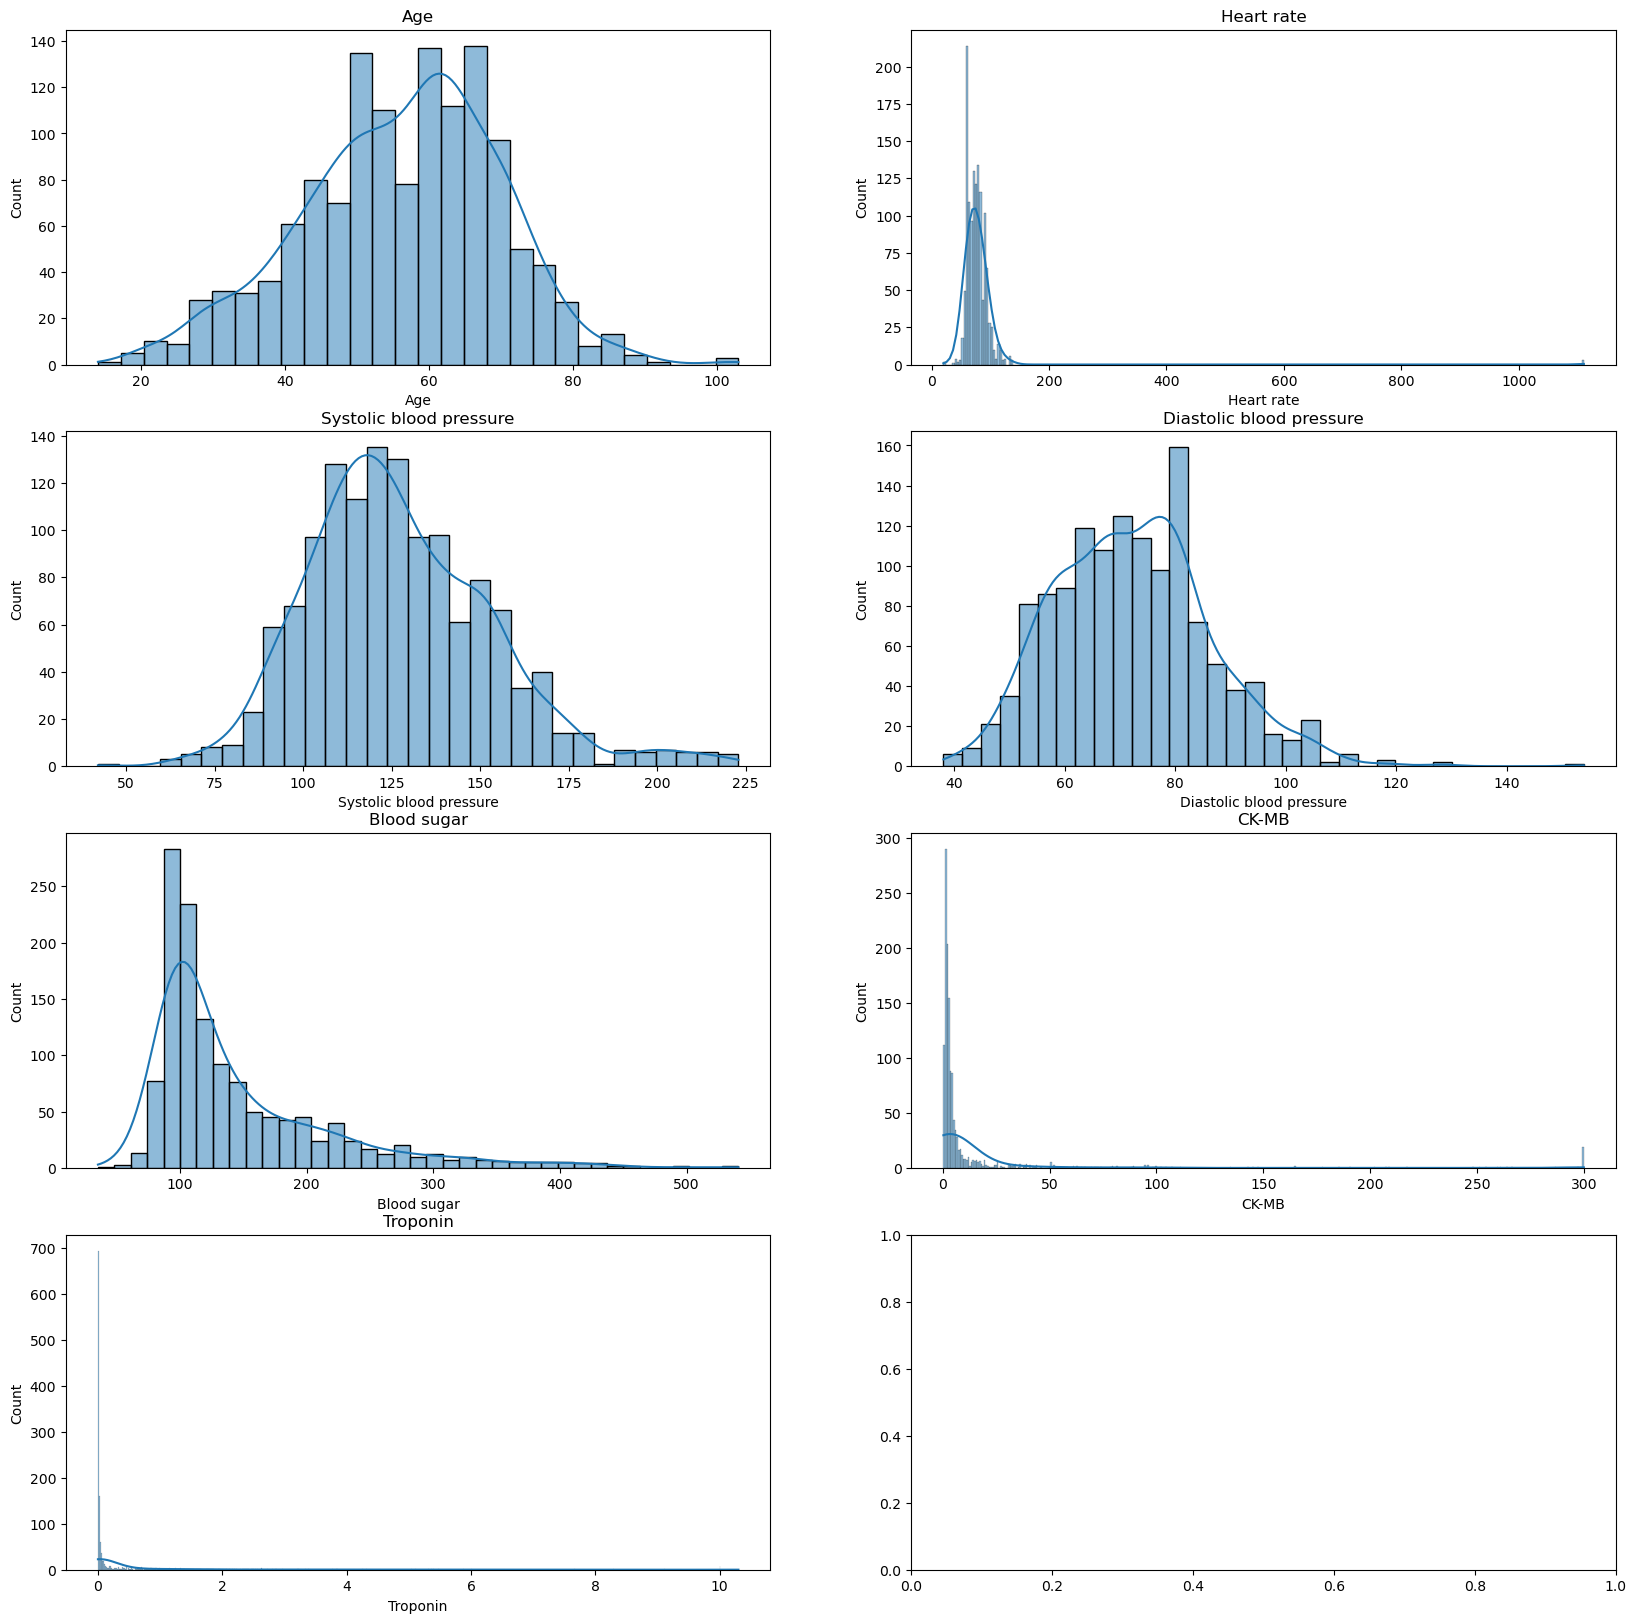

In [19]:
# Histogramme des variables quantitatives pour visualiser leur distribution
plt.subplots(4,2,figsize=(20,20))
for i , var in enumerate(var_quant,1):
    plt.subplot(4,2,i)
    sns.histplot(data[var],kde=True)
    plt.title(var)

In [20]:
# Test de normalité de Shapiro
normalite = [] 
p_values = []
for col in var_quant :
    stats,p_value = shapiro(data[col])
    p_values.append(p_value)
    if p_value > 0.05 :
        normalite.append("OUI")
    else :
        normalite.append("NON")
resultat = pd.DataFrame({"Variables":var_quant,"P-Valeur":p_values,"Normalité":normalite})
print(resultat)

                  Variables      P-Valeur Normalité
0                       Age  4.902372e-07       NON
1                Heart rate  0.000000e+00       NON
2   Systolic blood pressure  2.377439e-15       NON
3  Diastolic blood pressure  7.229008e-11       NON
4               Blood sugar  1.639295e-38       NON
5                     CK-MB  0.000000e+00       NON
6                  Troponin  0.000000e+00       NON


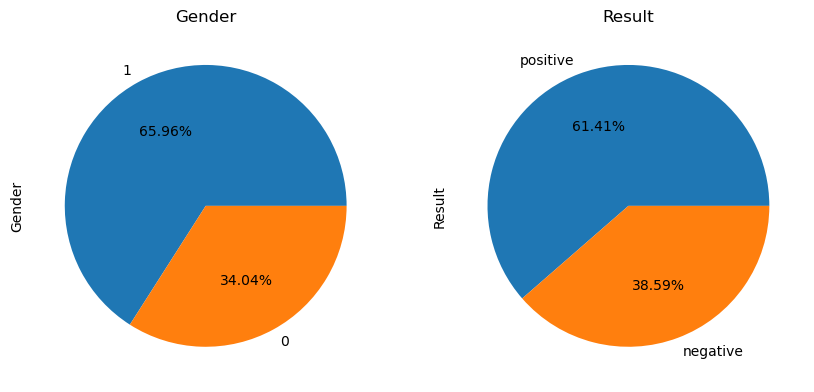

In [21]:
# Proportion des variables qualitatives
plt.subplots(1,2,figsize=(10,10))
for i , var in enumerate(var_cal,1):
    plt.subplot(1,2,i)
    data[var].value_counts().plot.pie(autopct = '%1.2f%%')
    plt.title(var)

## Analyse bivariée

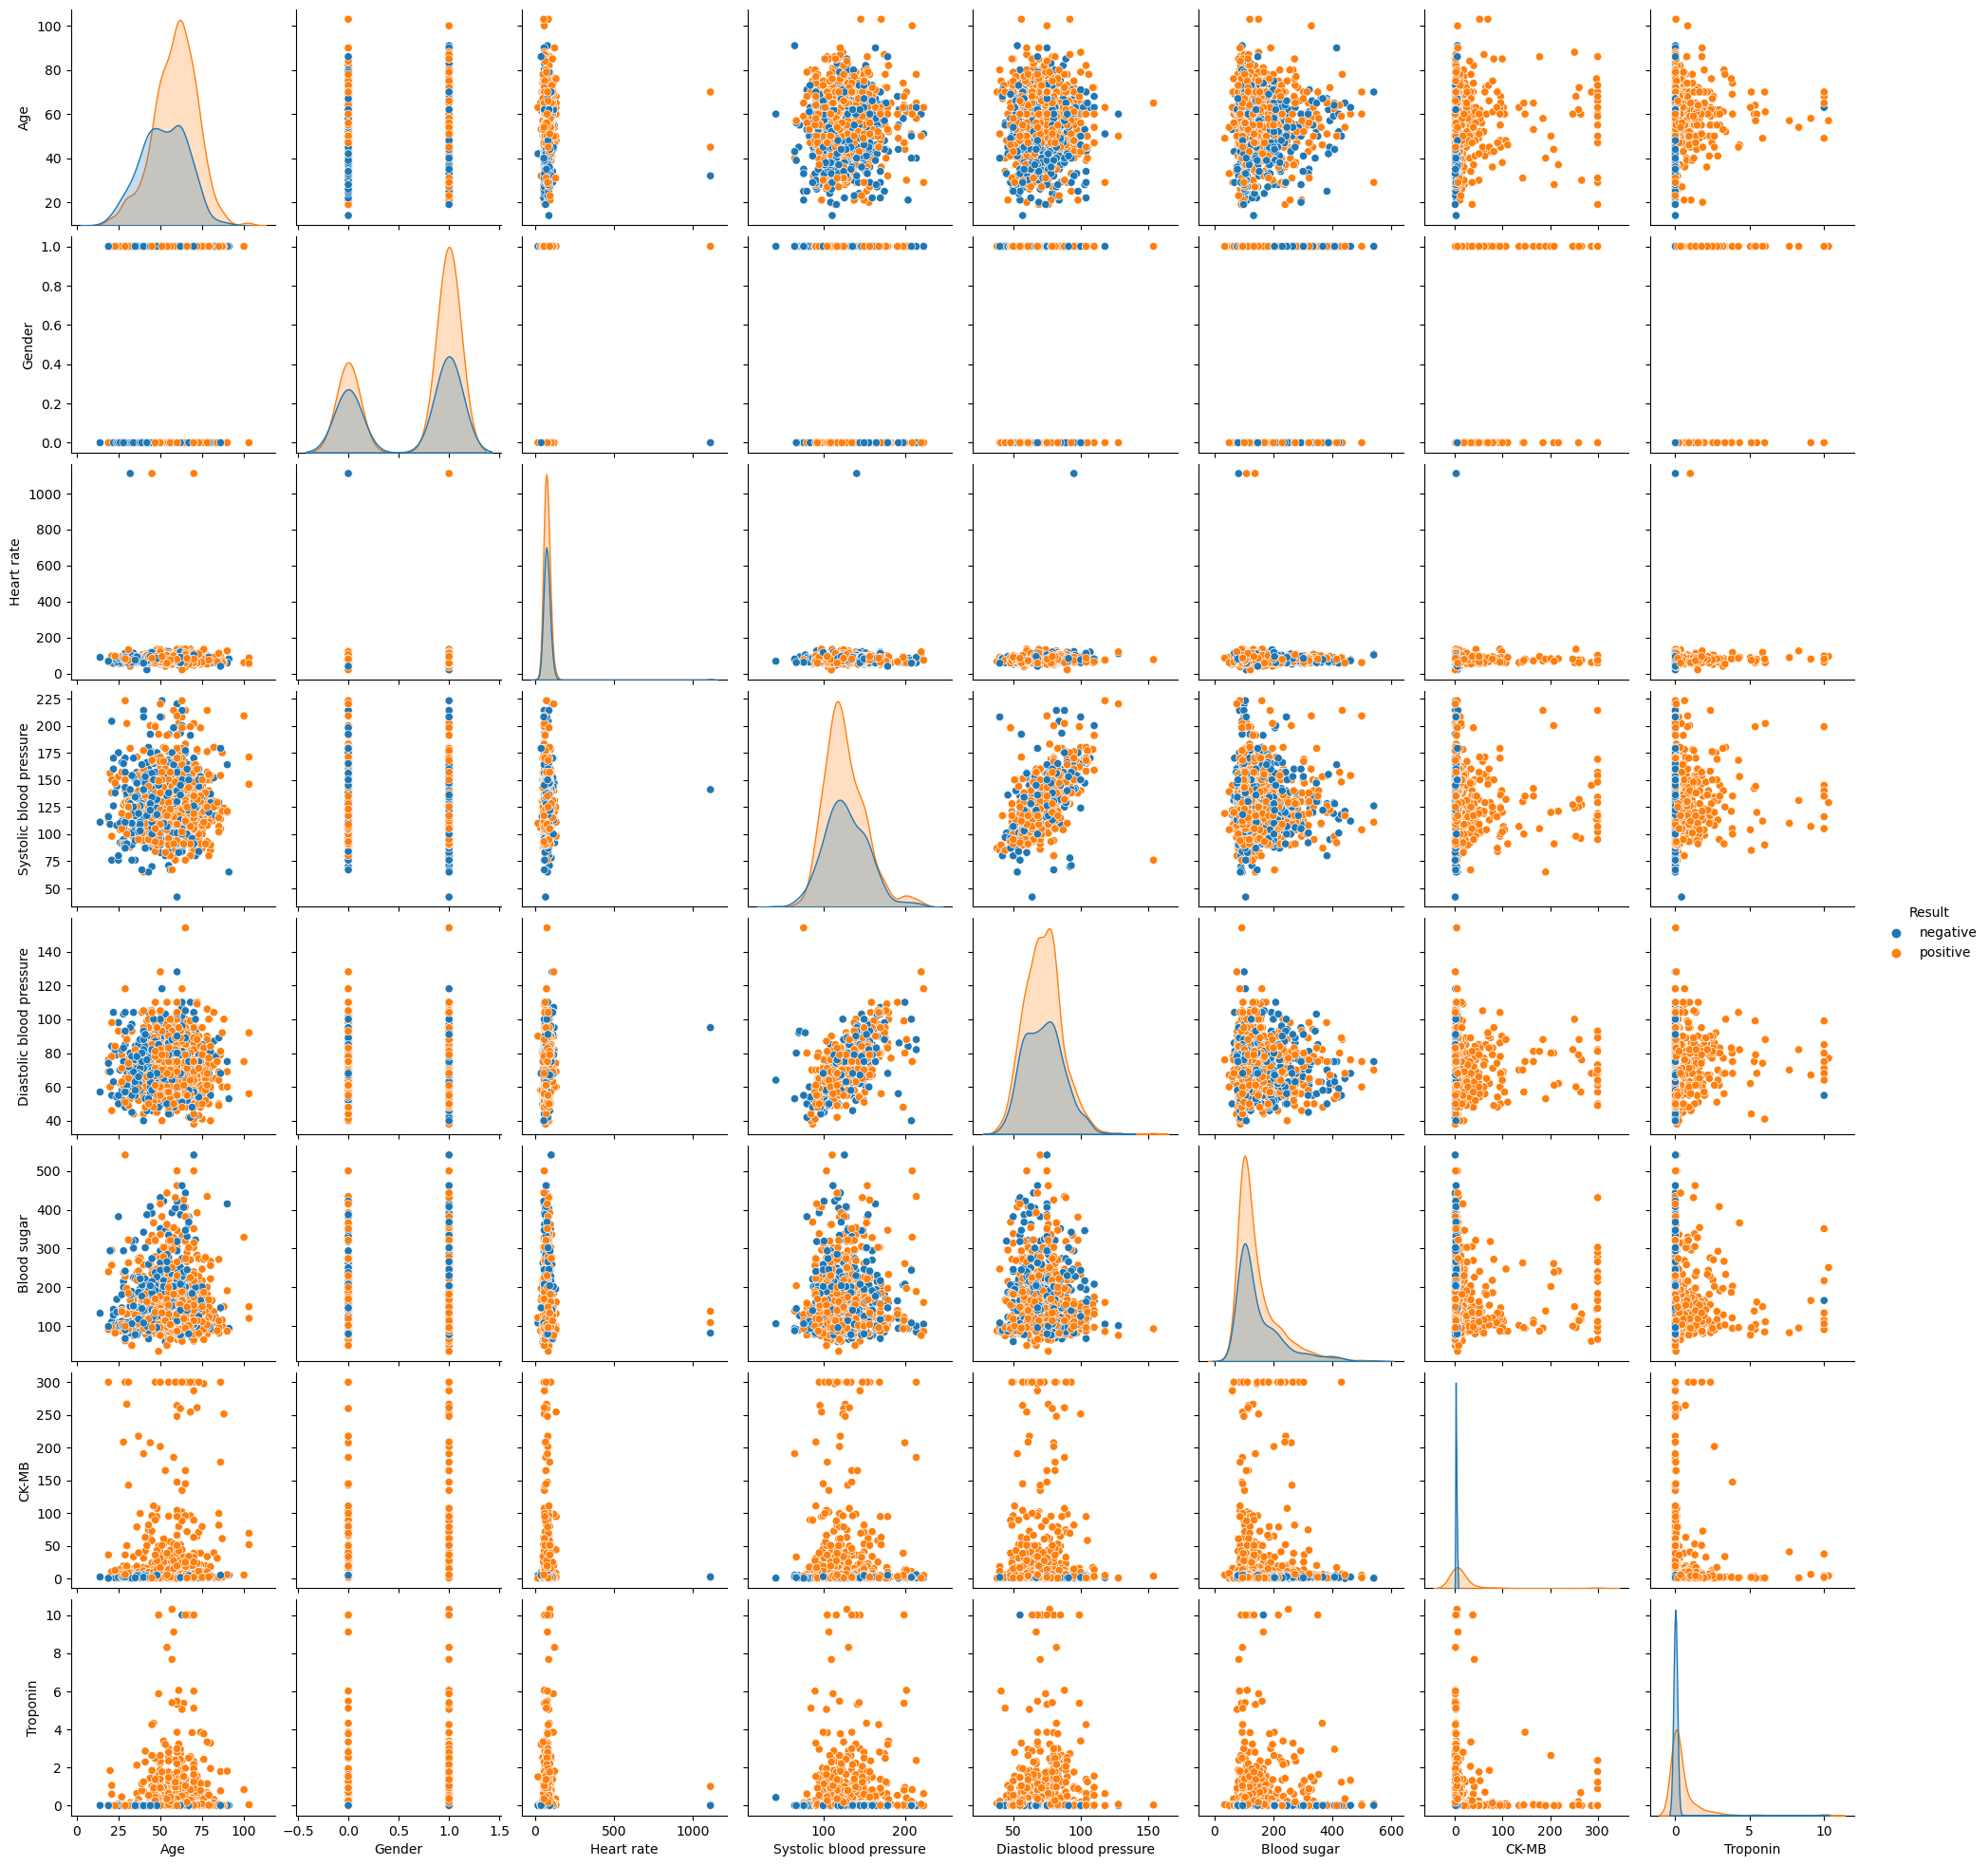

In [22]:
# Paiplot
sns.pairplot(data,hue="Result")

<Axes: >

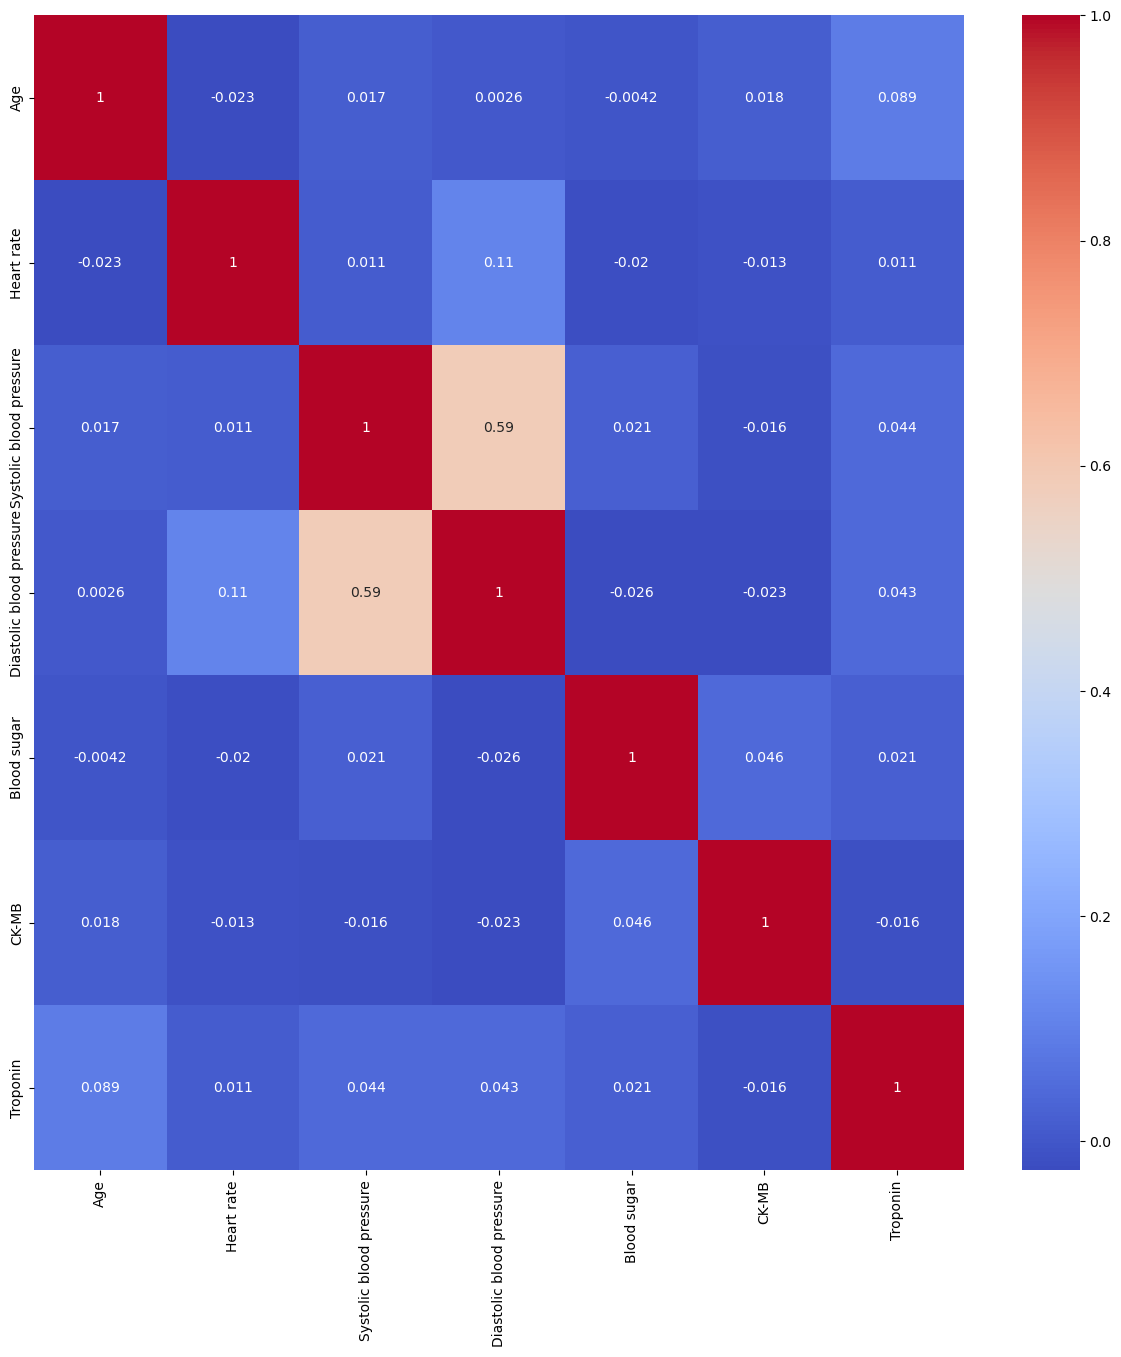

In [23]:
# Tableau de corrélation entre variables quantitatives
corr = data[var_quant].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm',annot=True)

On constate qu'il y a une forte corrélation positive entre la pression systolique et celle diastolique ce qui est tout à fait normal.

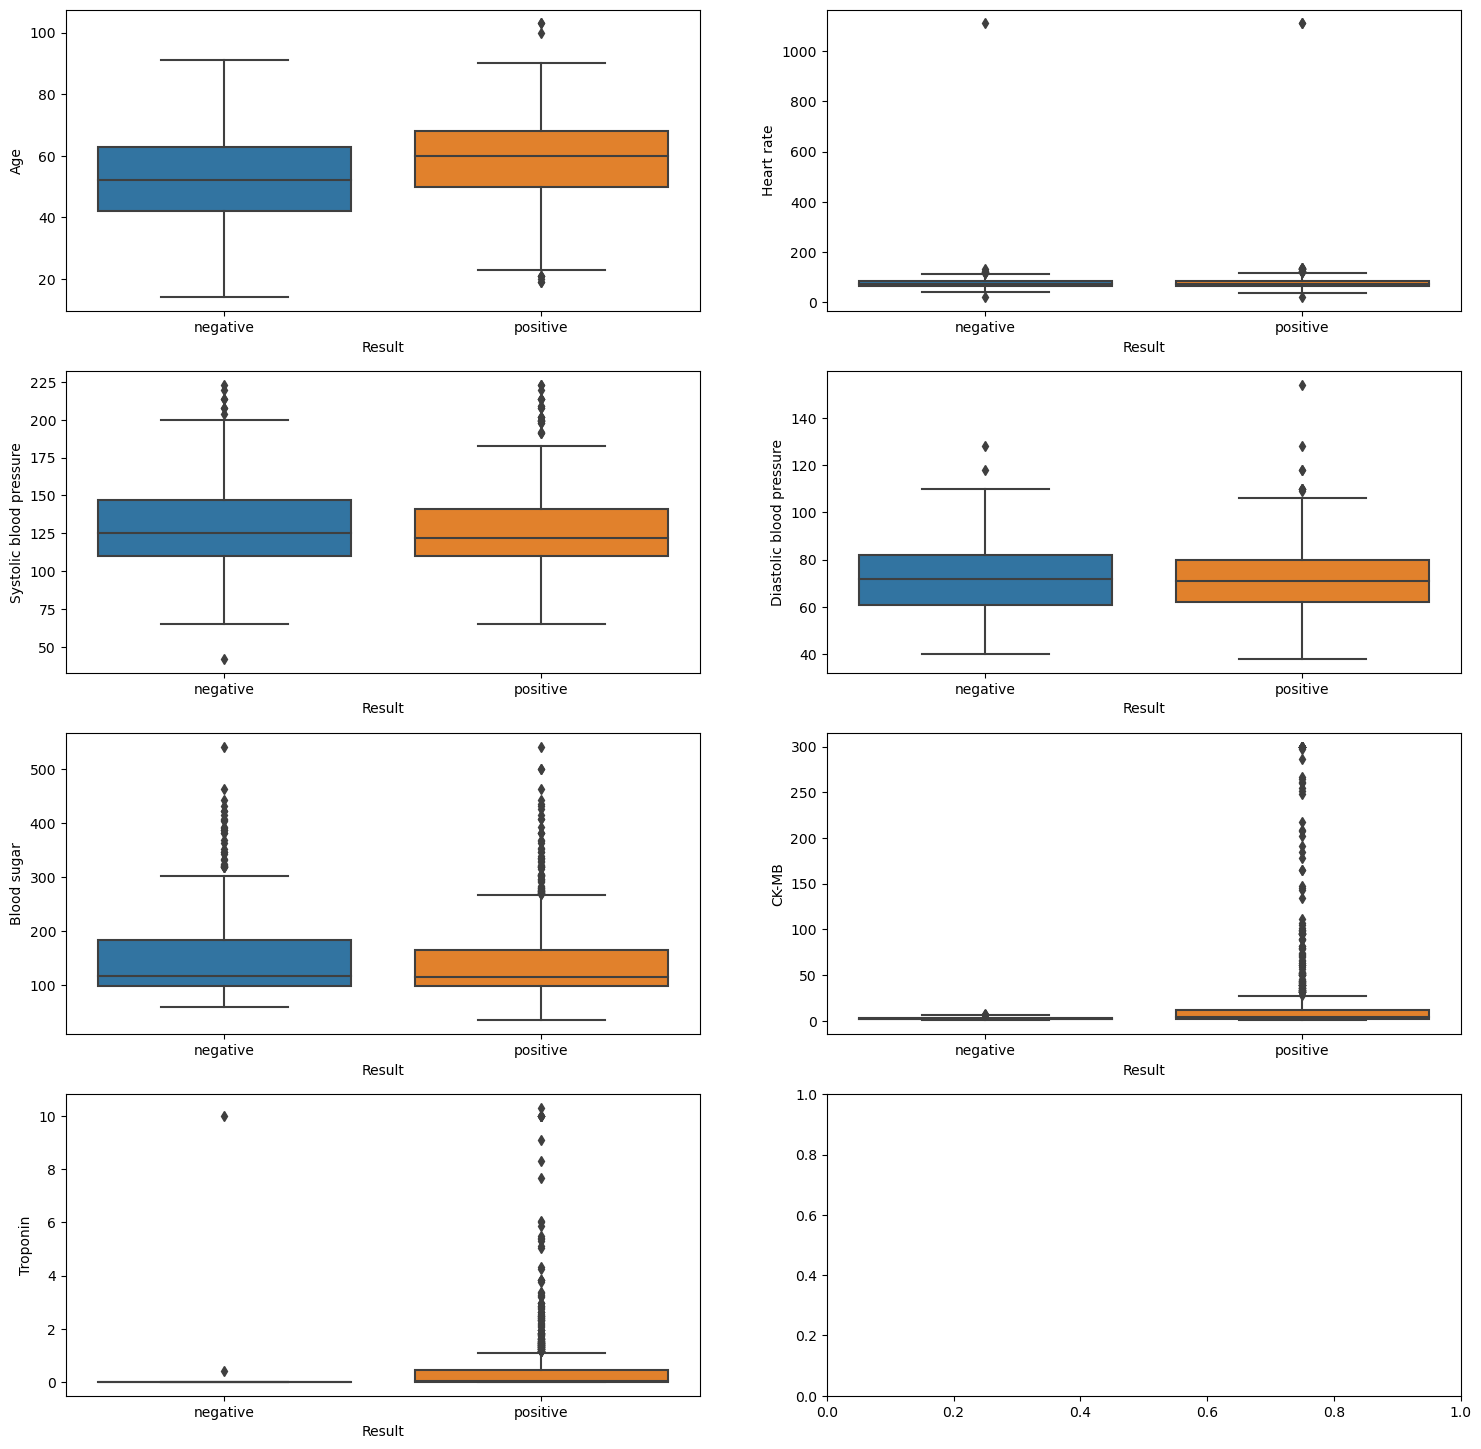

In [24]:
# Boxplots bivariés entre les variables quantitatives et la variable d'intérêt Result
plt.subplots(4,2,figsize=(18,18))
for i,var in enumerate(var_quant,1) :
    plt.subplot(4,2,i)
    sns.boxplot(data=data,x="Result",y=var)

On constate que les patients ayant été sujets à des infarctus ont un âge plus élevé que ceux qui n'ont pas été sujets à des infarctus. Leurs taux de troponine et de CK-MB sont tous aussi élévés. Et leur glycémie(Blood Sugar) plus faible que celles des patients négatifs. On ne note pas de différence sigicative pour les autres variables.

<Axes: xlabel='Gender'>

<Figure size 600x600 with 0 Axes>

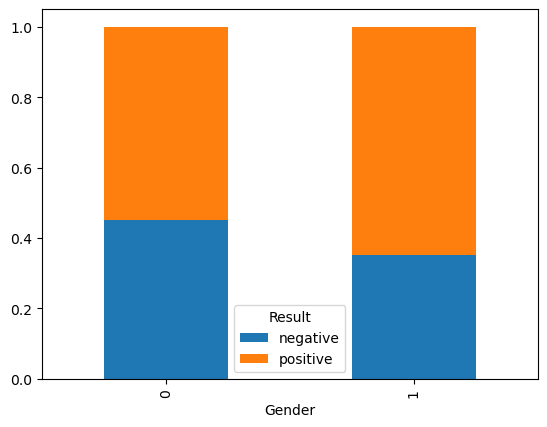

In [25]:
# Barplot bivarié entre les variables qualitatives et la variable d'intérêt Result
plt.figure(figsize=(6,6))
(data.groupby(["Gender", 'Result'])['Result'].count()/data.groupby(["Gender"])["Gender"].count()).unstack(level=1).plot(kind='bar', stacked=True)

On constate que les patients hommes sont plus sujets à des infarctus que les femmes.

In [26]:
# Test d'analyse bivarié de Kruskall
# Hypothèse nulle : les medianes des groupes sont comparables, pas de différence significative
variance = []
p_value_list = []
for var in data[var_quant].columns:
    group1 = data[data.Result=='negative'][var]
    group2 = data[data.Result=='positive'][var]
    
    stats,p_value = kruskal(group1,group2)
    p_value_list.append(p_value)
    if p_value < 0.05 :
        variance.append("OUI")
    else :
        variance.append("NON")
print(pd.DataFrame({"Variables":data[var_quant].columns,"P_values":p_value_list,"Existence_lien":variance}))

                  Variables       P_values Existence_lien
0                       Age   1.286243e-17            OUI
1                Heart rate   9.655764e-01            NON
2   Systolic blood pressure   1.846372e-01            NON
3  Diastolic blood pressure   7.747406e-01            NON
4               Blood sugar   5.150698e-01            NON
5                     CK-MB   2.543889e-28            OUI
6                  Troponin  1.187976e-128            OUI


Le test statiqtique de Kruskall-Wallis confirme les groupes d'invidus positifs et négatis sont significativement différents par rapport aux variables Age, CK-MB et Troponin.

### Analyse multivariée

In [27]:
# Séparation des données
features = data.drop(columns=["Result","Gender"],axis=1)

In [28]:
# Standardisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [29]:
# Reduction des dimensions des données
pca = PCA()
feat_pca = pca.fit_transform(features_scaled)

In [30]:
# Choix des axes factoriels
table = pd.DataFrame({"Axes_factoriels":["Axe"+str(x+1) for x in range(features.shape[1])],
                     "%_variance_expliquee":pca.explained_variance_ratio_*100,
                     "%_cumulee_variance_expliquee":np.cumsum(pca.explained_variance_ratio_*100)})
print(table)

  Axes_factoriels  %_variance_expliquee  %_cumulee_variance_expliquee
0            Axe1             22.955389                     22.955389
1            Axe2             15.624120                     38.579509
2            Axe3             14.954396                     53.533905
3            Axe4             14.138780                     67.672685
4            Axe5             13.831239                     81.503924
5            Axe6             12.723186                     94.227110
6            Axe7              5.772890                    100.000000


<Axes: xlabel='Axes_factoriels', ylabel='%_variance_expliquee'>

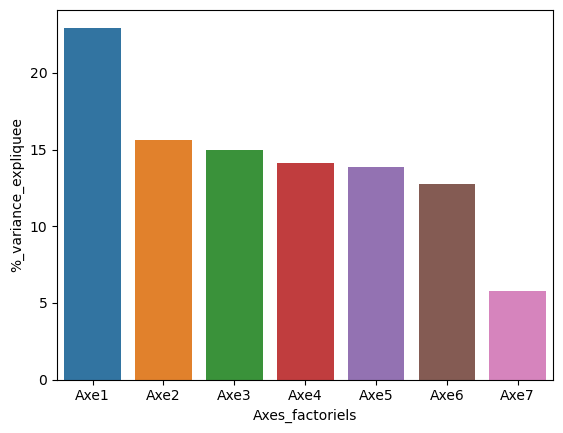

In [31]:
# Visualisation des axes factoriels par pourcentage de variance expliquée
sns.barplot(data=table,x="Axes_factoriels",y="%_variance_expliquee")

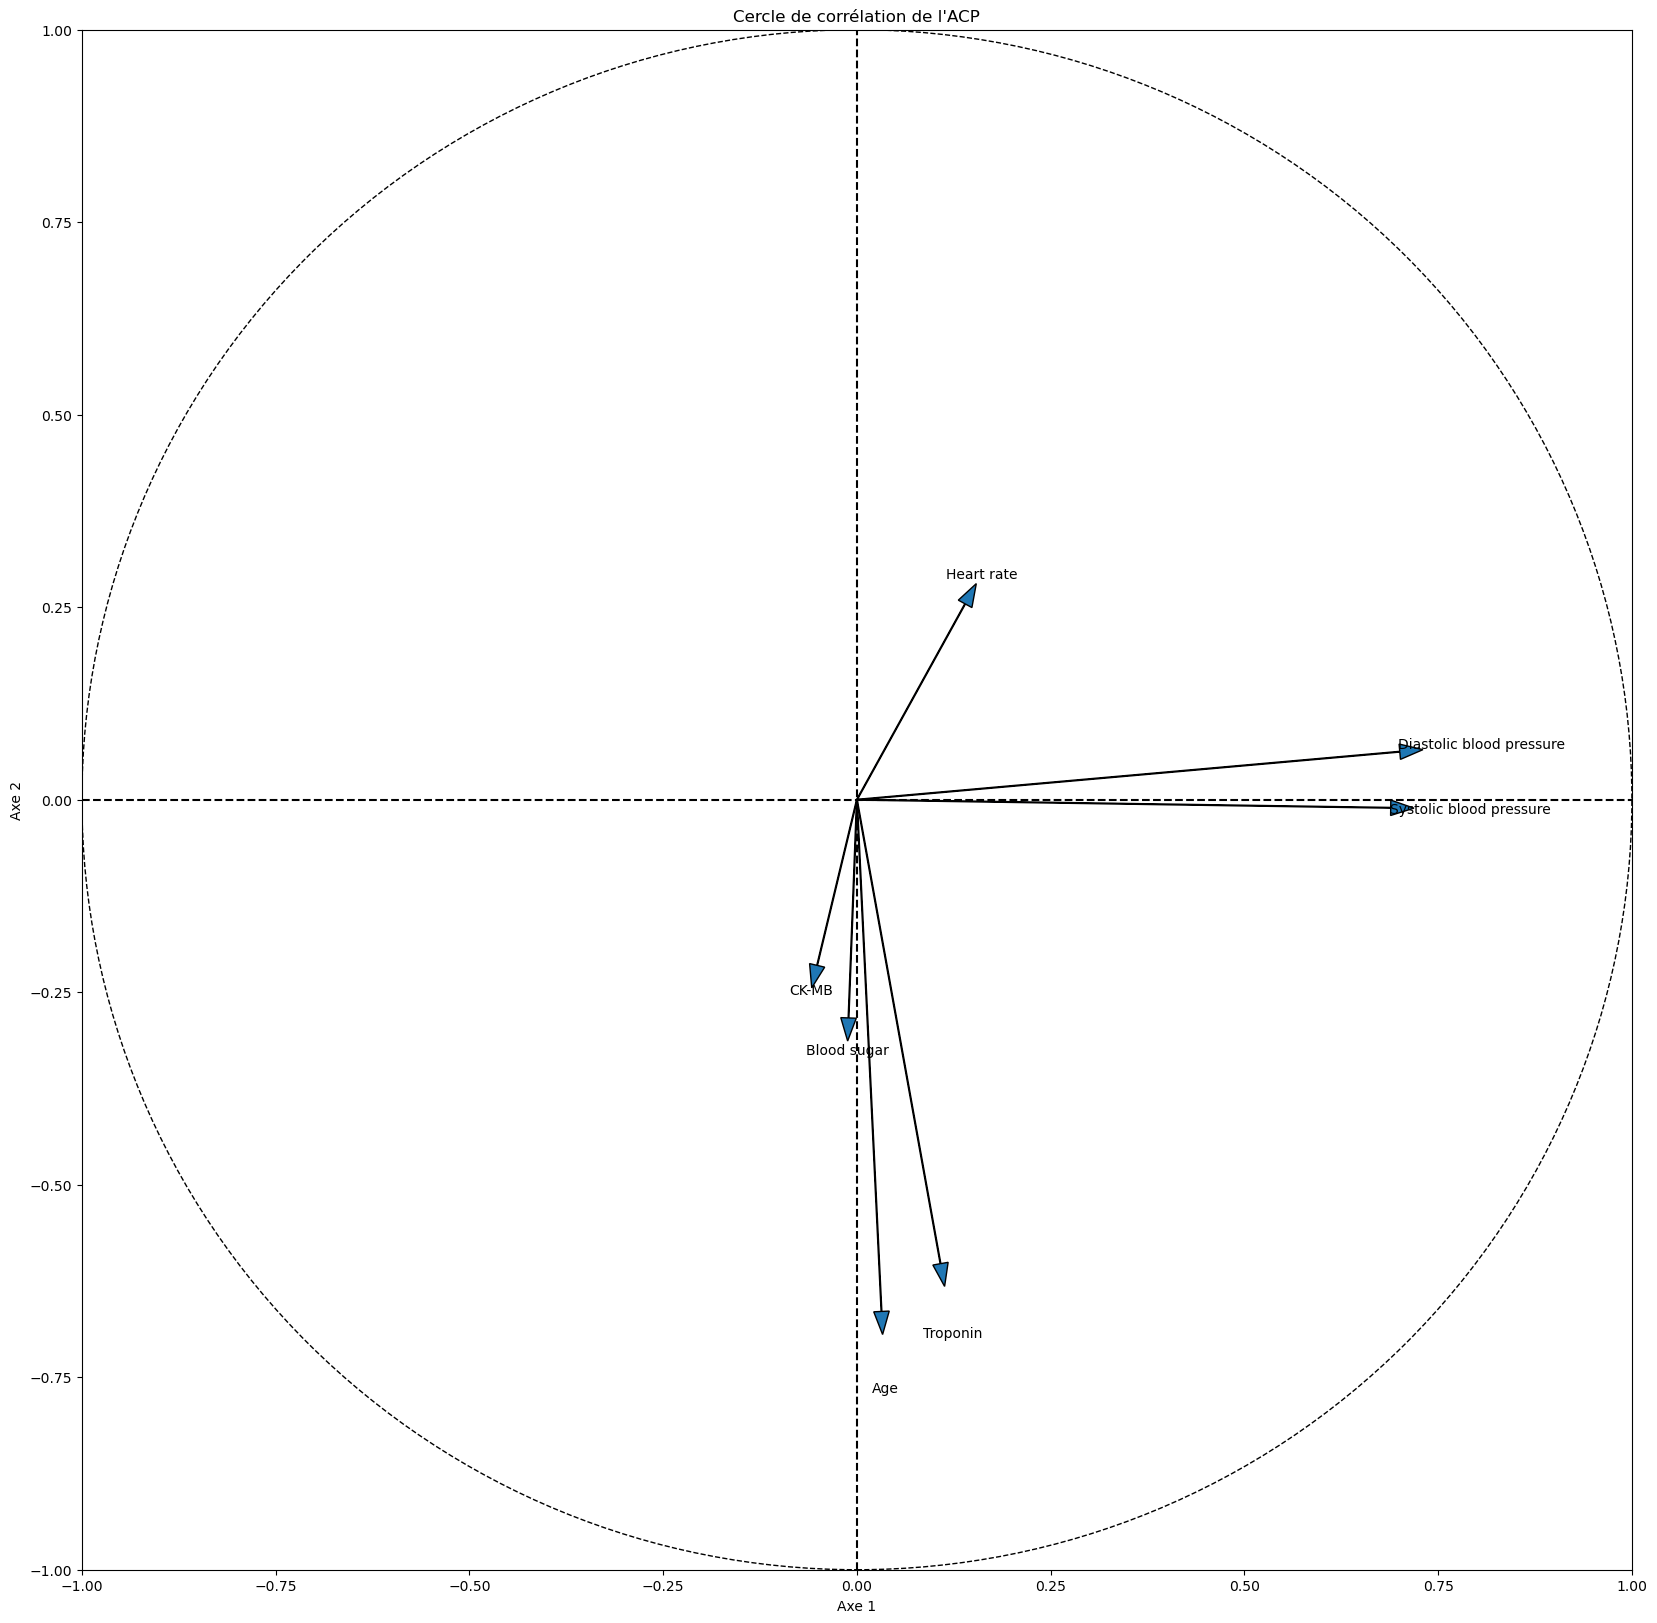

In [32]:
# Représentation graphique

# Récupérer les deux premiers axes factoriels
ax_fact = np.transpose(pca.components_[:2])

# Définir le nombre de vecteurs à placer
n = 7

# Crééer la figure
plt.subplots(figsize=(20,20))

# Projeter les vecteurs et leur annotation sur les axes factoriels
for i in range(n):
    plt.arrow(0,0,ax_fact[i,0],ax_fact[i,1],head_width=0.02)
    plt.text(ax_fact[i,0]*1.15,ax_fact[i,1]*1.15,features.columns[i],va="center",ha="center")

# Placer le cercle unitaire
cercle = plt.Circle((0,0),1,color="black",linestyle='--',fill=False)

# Ajouter le cercle à la figure
plt.gca().add_artist(cercle)

# Ajuster les limites et les axes
plt.axhline(0,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')

plt.xlim(-1,1)
plt.ylim(-1,1)

# Noms des axes et figure
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Cercle de corrélation de l'ACP")

# Afficher la figure
plt.show()

### Interprêtation du cercle

D'après le cercle nous pouvons constater que les vecteurs unitaires de la pression diastolique et de la pression systolique sont mieux mieux représentés par l'axe factoriel 2. Aussi l'angle entre ces deux vecteurs est très petit ce qui indique une forte corrélation positive entre ces deux variables.

Pa ailleurs, les autres vecteurs sont mieux représentés sur l'axe 1. On remarque l'angle entre les vecteurs CK-MB, Age,Troponin et Blood Sugar est très petit ce qui indique une forte corrélation positive entre ces variables. 

## Conclusion

D'après ces analyses, nous pouvons conclure que les signes indicatifs d'un patient susceptible d'avoir un infarctus sont : une conccentration en CK-MB et Troponine le plus souvent élevée. L'échantillon contient plus d'hommes que de femmes (65.96% contre 34.04%). Les patients présentant un risque d'infarctus sont plus représentés (61.41 % contre 38.59%).